# Test Sentiment Analysis

In [2]:
import datetime
import copy as c
import random
import collections
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import re
#!pip install afinn
from afinn import Afinn
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [3]:
#On récupère directement le dataset nettoyé
url_local=r"C:\Users\Antoine\Downloads\clean_ecb_speeches_dataset.csv"
df=pd.read_csv(url_local,sep = ",",encoding='utf-8')

In [4]:
df

date              speakers  \
0     2021-12-10         Fabio Panetta   
1     2021-12-08       Isabel Schnabel   
2     2021-12-08       Luis de Guindos   
3     2021-12-08     Christine Lagarde   
4     2021-11-29     Christine Lagarde   
...          ...                   ...   
2329  1997-05-13  Alexandre Lamfalussy   
2330  1997-04-30  Alexandre Lamfalussy   
2331  1997-04-22  Alexandre Lamfalussy   
2332  1997-03-10  Alexandre Lamfalussy   
2333  1997-02-07  Alexandre Lamfalussy   

                                                  title  \
0     The present and future of money in the digital...   
1               Monetary policy and financial stability   
2     Macroprudential policy for non-bank financial ...   
3     Macroprudential policy in Europe – the future ...   
4                          Dialogue in a changing world   
...                                                 ...   
2329  The European Central Bank: independent and acc...   
2330  The operation of monetary policy in stage thre...   
2331  Convergence and the role of the European Centr...   
2332                       Securing the benefits of EMU   
2333  Conference organised by the Hungarian Banking ...   

                                               subtitle  \
0     Lecture by Fabio Panetta, Member of the Execut...   
1     Speech by Isabel Schnabel, Member of the Execu...   
2     Speech by Luis de Guindos, Vice-President of t...   
3     Welcome remarks by Christine Lagarde, Presiden...   
4     Lectio Magistralis by Christine Lagarde, Presi...   
...                                                 ...   
2329  Keynote speech delivered by Alexandre Lamfalus...   
2330  Address by Alexandre Lamfalussy, President of ...   
2331  Remarks by Alexandre Lamfalussy, President of ...   
2332  Address by Alexandre Lamfalussy, President of ...   
2333  Address by Alexandre Lamfalussy, President of ...   

                                               contents  Year  Month  Day  \
0        SPEECH  The present and future of money in ...  2021     12   10   
1        SPEECH  Monetary policy and financial stabi...  2021     12    8   
2        SPEECH  Macroprudential policy for non-bank...  2021     12    8   
3        SPEECH  Macroprudential policy in Europe – ...  2021     12    8   
4        SPEECH  Dialogue in a changing world   Lect...  2021     11   29   
...                                                 ...   ...    ...  ...   
2329    The European Central Bank: independent and a...  1997      5   13   
2330    The operation of monetary policy in stage th...  1997      4   30   
2331    Convergence and the role of the European Cen...  1997      4   22   
2332    Securing the benefits of EMU   Address by Al...  1997      3   10   
2333    Conference organised by the Hungarian Bankin...  1997      2    7   

      DayofWeek DayofWeek_str Month_str  
0             5        Friday  December  
1             3     Wednesday  December  
2             3     Wednesday  December  
3             3     Wednesday  December  
4             1        Monday  November  
...         ...           ...       ...  
2329          2       Tuesday       May  
2330          3     Wednesday     April  
2331          2       Tuesday     April  
2332          1        Monday     March  
2333          5        Friday  February  

[2334 rows x 11 columns]

# Librairies non spécialisées

In [5]:
# https://ednafernandes.medium.com/three-python-libraries-for-sentiment-analysis-c189655e0d9b
#Article intéressant pour 3 librairies classiques/basiques pour l'analyse de sentiments
# TextBlob
# AFINN
# Vader

## AFINN

In [6]:
afinn = Afinn()
#exemple :
afinn.score('This is utterly excellent!')

3.0

In [7]:
"""from afinn import Afinn
def afinn_polarity(text):
    return Afinn().score(text)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['polarity'] = df[text].apply(afinn_polarity)
df['classification'] = df['polarity'].apply(getAnalysis)"""

"from afinn import Afinn\ndef afinn_polarity(text):\n    return Afinn().score(text)\ndef getAnalysis(score):\n    if score < 0:\n        return 'Negative'\n    elif score == 0:\n        return 'Neutral'\n    else:\n        return 'Positive'\ndf['polarity'] = df[text].apply(afinn_polarity)\ndf['classification'] = df['polarity'].apply(getAnalysis)"

In [8]:
#Premier test du score AFINN
start = time.time()
N=random.randrange(0, len(df))
print("Score :", afinn.score(df["contents"][N]))
end = time.time()
print("Temps pris :", end-start)
#Une première estimation donne une durée totale d'analyse d'un peu plus de 6 minutes pour tous les discours

Score : 45.0
Temps pris : 0.09674072265625


In [9]:
start = time.time()

df["afinn-score"]=pd.Series(dtype=int)
def afinn_score(text):
    return afinn.score(text)

df["afinn-score"]=df["contents"].apply(afinn_score)

end = time.time()
print("Temps pris :", end-start) #~3 minutes

Temps pris : 191.59353709220886


Score moyen : 91.70522707797772
Score médian : 85.0


<AxesSubplot:>

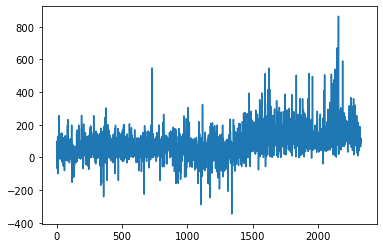

In [10]:
print("Score moyen :", df["afinn-score"].mean())
print("Score médian :",df["afinn-score"].median())

df["afinn-score"].plot()

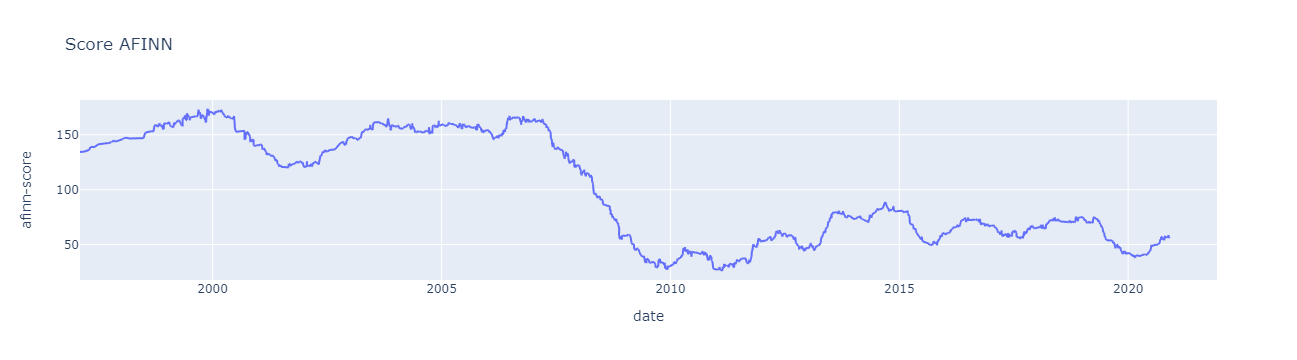

In [11]:
#pour demander un input de la période
#val=int(input("Période en jours de la moyenne mobile :"))

val=90
fig=df.rolling(val, on="date").mean().plot(x="date",y="afinn-score",backend='plotly', title="Score AFINN")

fig.show()

## TextBlob

In [12]:
"""from textblob import TextBlob
def textblob_polarity(text):
 return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['polarity'] = df[text].apply(textblob_polarity)
df['classification'] = df['polarity'].apply(getAnalysis)"""

"from textblob import TextBlob\ndef textblob_polarity(text):\n return TextBlob(text).sentiment.polarity\ndef getAnalysis(score):\n    if score < 0:\n        return 'Negative'\n    elif score == 0:\n        return 'Neutral'\n    else:\n        return 'Positive'\ndf['polarity'] = df[text].apply(textblob_polarity)\ndf['classification'] = df['polarity'].apply(getAnalysis)"

In [13]:
start = time.time()

df["textblob-score"]=pd.Series(dtype=int)
def textblob_score(text):
    return TextBlob(text).sentiment.polarity

df["textblob-score"]=df["contents"].apply(textblob_score)

end = time.time()
print("Temps pris :", end-start) #~40 secondes

Temps pris : 36.281933307647705


Score moyen : 0.1047167025466477
Score médian : 0.10119140438552868


<AxesSubplot:>

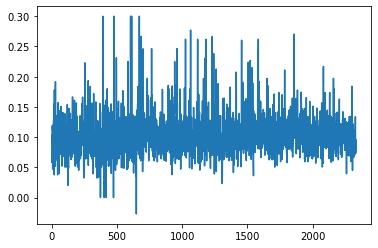

In [14]:
print("Score moyen :", df["textblob-score"].mean())
print("Score médian :",df["textblob-score"].median())

df["textblob-score"].plot()

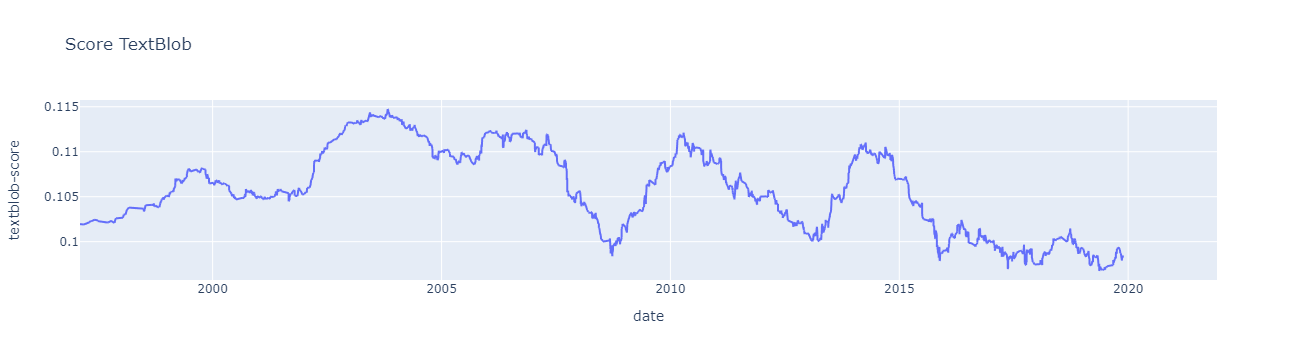

In [15]:
#pour demander un input de la période
#val=int(input("Période en jours de la moyenne mobile :"))

val=180
fig=df.rolling(val, on="date").mean().plot(x="date",y="textblob-score",backend='plotly', title="Score TextBlob")

fig.show()

## Vader Sentiment Lexicon

In [ ]:
"""from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def varder_polarity(text):
    return SentimentIntensityAnalyzer().polarity_scores(text)
def varder_analysis(score):
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'
df['polarity'] = df[text].apply(varder_analysis)
df['classification'] = df['polarity'].apply(varder_analysis)"""

In [ ]:
##############################

# /!\ plus de 20 minutes /!\

##############################

start = time.time()

# Exemple de résultat de de modèle
# {'neg': 0.029, 'neu': 0.878, 'pos': 0.092, 'compound': 0.9999}
df["vader-score"]=pd.Series(dtype=int)

def vader_score(text):
    #retourne un dictionnaire
    return SentimentIntensityAnalyzer().polarity_scores(text)

def vader_score_compound(text):
    #retourne un float
    return SentimentIntensityAnalyzer().polarity_scores(text)['compound']

#df["vader-score"]=df["contents"].apply(vader_score_compound)

end = time.time()
print("Temps pris :", end-start) #23 minutes

In [ ]:
#print("Score moyen :", df["vader-score"].mean())
#print("Score médian :",df["vader-score"].median())

#df["vader-score"].plot()

## Corrélation entre les différents scores

In [ ]:
df['afinn-score'].corr(df['vader-score'])

In [16]:
df['afinn-score'].corr(df['textblob-score'])

0.1354853200911117

In [ ]:
df['vader-score'].corr(df['textblob-score'])

Les scores sont plus positifs que négatifs en général, mais il faudrait utiliser des librairies plus spécialisées (tournées vers l'économie et la finance).

# Librairies spécialisées

Au cours de nos recherches, plusieurs dictionnaires, listes ou bases de données sont apparus à plusieurs reprises comme des références dans l'analyse de sentiments de textes financiers comme :
- Loughran and McDonald
    - https://sraf.nd.edu/ et https://drive.google.com/file/d/1moS1tkh_AJafpcIFpktaSvZwrzv5d4ix/view
    - https://pypi.org/project/pysentiment2/#description 
- FED Financial Stability dictionary
    - https://www.federalreserve.gov/econres/notes/ifdp-notes/constructing-a-dictionary-for-financial-stability-20170623.htm
    - https://www.federalreserve.gov/econres/ifdp/files/ifdp1203.pdf [REPORT]
    - https://www.federalreserve.gov/econres/ifdp/files/ifdp1203-appendix.xlsx [DATA]
- 
- Dataset "financial_phrasebank" https://huggingface.co/datasets/financial_phrasebank

## Loughran and McDonald

In [17]:
#!pip install pysentiment2
import pysentiment2 as ps
lm = ps.LM() #to use the Loughran and McDonald dictionary

In [18]:
text=df["contents"][0]


tokens = lm.tokenize(text)
score = lm.get_score(tokens)

score

{'Positive': 125,
 'Negative': 165,
 'Polarity': -0.13793103400713436,
 'Subjectivity': 0.09244501112768728}

### Polarity

In [19]:
def LM_polarity(text):
    '''Pour obtenir la polarité d'un texte selon le dictionnaire Loughran and McDonald'''
    '''Polarity= (Pos-Neg)/(Pos+Neg)'''
    #lm = pysentiment2.LM() 
    #to use the Loughran and McDonald dictionary
    tokens = lm.tokenize(text)
    return round(lm.get_score(tokens)['Polarity'],4)

In [20]:
start = time.time()

df["LM-polarity"]=pd.Series(dtype=float)

df["LM-polarity"]=df["contents"].apply(LM_polarity)

end = time.time()
print("Temps pris :", end-start, "secondes")
#Temps pris : 110.3992772102356 secondes

Temps pris : 112.32963180541992 secondes


In [21]:
print("Polarité moyenne :", df["LM-polarity"].mean()) #Polarité moyenne : -0.04744399141630894

print("Polarité médiane :",df["LM-polarity"].median()) #Polarité médiane : -0.06055

Polarité moyenne : -0.04777600685518417
Polarité médiane : -0.06135


### Subjectivity

In [22]:
def LM_subjectivity(text):
    '''Pour obtenir la subjectivité d'un texte selon le dictionnaire Loughran and McDonald'''
    '''Subjectivity= (Pos+Neg)/count'''
    #lm = pysentiment2.LM() 
    #to use the Loughran and McDonald dictionary
    tokens = lm.tokenize(text)
    return round(lm.get_score(tokens)['Subjectivity'],4) #on arrondit le résultat

In [23]:
start = time.time()

df["LM-subjectivity"]=pd.Series(dtype=float)
df["LM-subjectivity"]=df["contents"].apply(LM_subjectivity)

end = time.time()
print("Temps pris :", end-start, "secondes")
#Temps pris : 114.29144740104675 secondes

Temps pris : 113.4287223815918 secondes


In [24]:
print("Subjectivité moyenne :", df["LM-polarity"].mean()) #Subjectivité moyenne : -0.04744399141630894

print("Subjectivité médiane :",df["LM-polarity"].median()) #Subjectivité médiane : -0.06055

Subjectivité moyenne : -0.04777600685518417
Subjectivité médiane : -0.06135


### Graphiques Polarité et Subjectivité

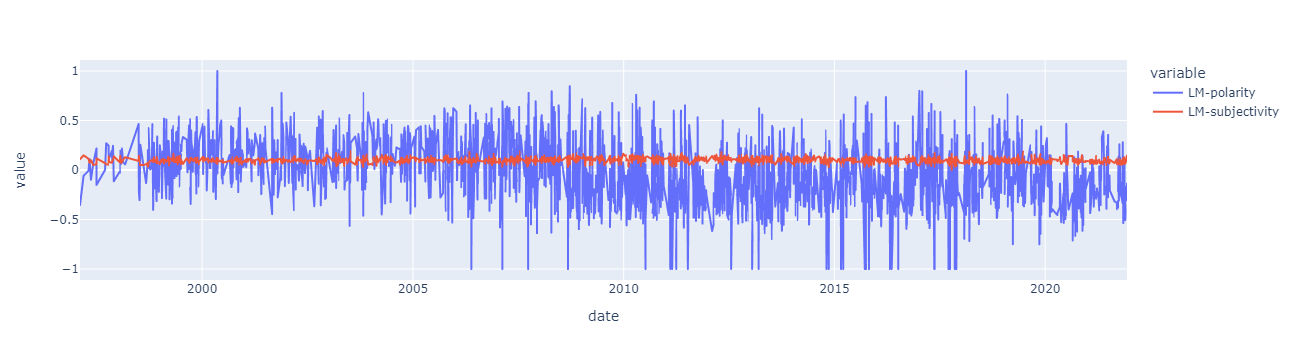

In [25]:
fig = px.line(df, x="date",y=["LM-polarity","LM-subjectivity"])
fig.show()
#peu lisible

<AxesSubplot:xlabel='Year,Month'>

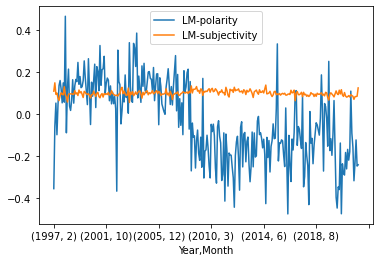

In [26]:
df1=df.groupby(["Year","Month"]).mean()
df1[["LM-polarity","LM-subjectivity"]].plot()
#une tendance se dégage pour la polarité

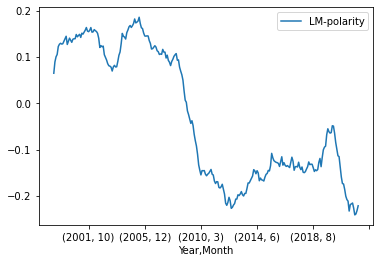

In [27]:
df2=df1.rolling(20).mean() #moyenne mobile sur 20 mois
fig=df2.plot(y="LM-polarity")

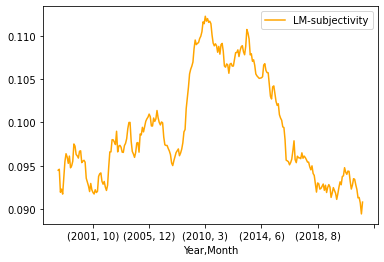

In [28]:
fig=df2.plot(y="LM-subjectivity", color='orange')

In [29]:
df.rolling(20, on="date").mean() #moyenne mobile sur 20 jours

date    Day  DayofWeek  LM-polarity  LM-subjectivity  Month  \
0     2021-12-10    NaN        NaN          NaN              NaN    NaN   
1     2021-12-08    NaN        NaN          NaN              NaN    NaN   
2     2021-12-08    NaN        NaN          NaN              NaN    NaN   
3     2021-12-08    NaN        NaN          NaN              NaN    NaN   
4     2021-11-29    NaN        NaN          NaN              NaN    NaN   
...          ...    ...        ...          ...              ...    ...   
2329  1997-05-13  17.65       3.05     0.098085         0.087980   7.10   
2330  1997-04-30  18.90       3.00     0.092770         0.087755   7.20   
2331  1997-04-22  18.50       2.85     0.089275         0.089940   7.35   
2332  1997-03-10  17.90       2.70     0.076590         0.090130   7.45   
2333  1997-02-07  17.30       2.90     0.060245         0.091540   7.50   

         Year  afinn-score  textblob-score  
0         NaN          NaN             NaN  
1         NaN          NaN             NaN  
2         NaN          NaN             NaN  
3         NaN          NaN             NaN  
4         NaN          NaN             NaN  
...       ...          ...             ...  
2329  1997.25       117.85        0.092042  
2330  1997.20       113.00        0.092565  
2331  1997.15       109.60        0.091207  
2332  1997.10       108.15        0.090131  
2333  1997.05       108.40        0.091380  

[2334 rows x 9 columns]

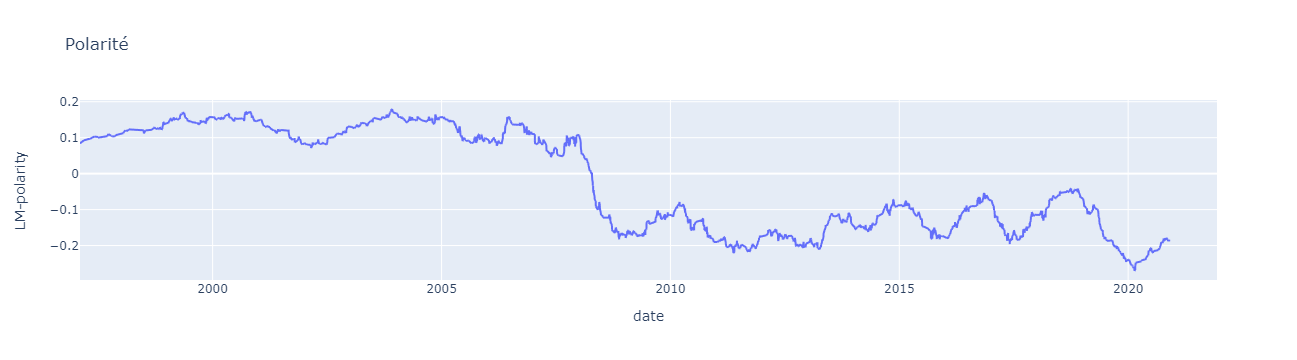

In [30]:
#pour demander un input de la période
#val=int(input("Période en jours de la moyenne mobile :"))

val=90
fig=df.rolling(val, on="date").mean().plot(x="date",y="LM-polarity",backend='plotly', title="Polarité")
fig.show()

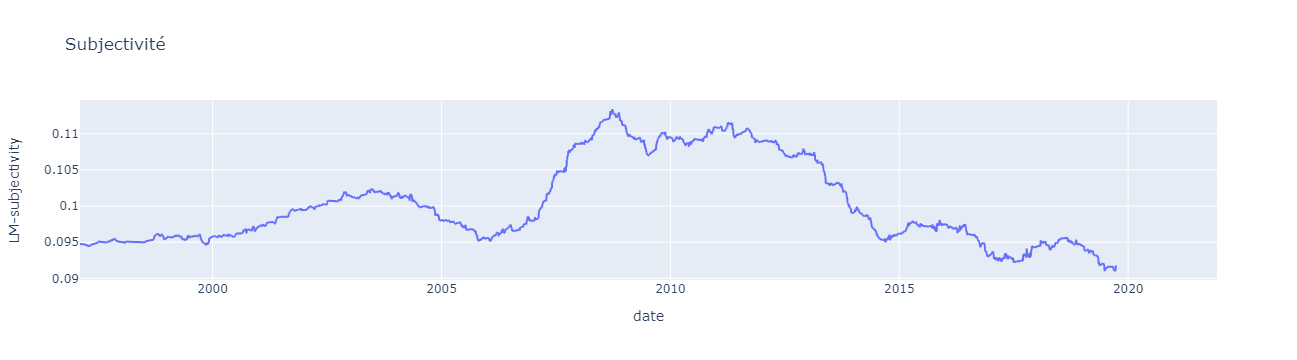

In [31]:
#pour demander un input de la période
#val=int(input("Période en jours de la moyenne mobile :"))

val=200
fig=df.rolling(val, on="date").mean().plot(x="date",y="LM-subjectivity",backend='plotly', title="Subjectivité")

fig.show()

Les résultas obtenus semblent cohérents.

## FED Financial Stability dictionary

In [32]:
#FS Dictionary
fed1=pd.read_excel(r"https://www.federalreserve.gov/econres/ifdp/files/ifdp1203-appendix.xlsx", sheet_name=1)

In [33]:
fed1
#ce format de dataframe n'est pas facile à exploiter
#on va le transformer en deux listes

Word  Positive  Negative
0          able       1.0       NaN
1    abnormally       NaN       1.0
2        abrupt       NaN       1.0
3        absorb       1.0       NaN
4      absorbed       1.0       NaN
..          ...       ...       ...
386      worsen       NaN       1.0
387    worsened       NaN       1.0
388   worsening       NaN       1.0
389       worst       NaN       1.0
390  writedowns       NaN       1.0

[391 rows x 3 columns]

In [34]:
positive_words=fed1[fed1["Positive"].notna()]["Word"]
positive_list=positive_words.values.tolist()
#positive_list

In [35]:
negative_words=fed1[fed1["Negative"].notna()]["Word"]
negative_list=negative_words.values.tolist()
#negative_list

In [36]:
#FS Dictionary print
fed2=pd.read_excel(r"https://www.federalreserve.gov/econres/ifdp/files/ifdp1203-appendix.xlsx", sheet_name=2)
fed2
#on retrouve sous un autre format les mêmes informations que le premier dataframe

Unnamed: 0    Unnamed: 1  Unnamed: 2      Unnamed: 3      Unnamed: 4  \
0   Positive words           NaN         NaN  Negative words             NaN   
1             able     mitigated         NaN      abnormally   destabilizing   
2           absorb     mitigates         NaN          abrupt     deteriorate   
3         absorbed    mitigating         NaN        abundant    deteriorated   
4        absorbing    mitigation         NaN         adverse   deteriorating   
5       acceptable   opportunity         NaN       adversely   deterioration   
6      achievement      optimism         NaN       aggravate  deteriorations   
7       adequately  outperformed         NaN      aggravated     detrimental   
8       alleviated      positive         NaN     aggravating       difficult   
9      alleviating    positively         NaN     aggravation    difficulties   
10      beneficial    preventing         NaN          ailing      difficulty   
11         benefit    profitable         NaN        alarming   disappointing   
12      benefiting       rallied         NaN         anxiety    discouraging   
13          benign    reassuring         NaN         arrears      disorderly   
14          better       rebound         NaN             bad         disrupt   
15        brighter     rebounded         NaN        burdened       disrupted   
16         broaden    rebounding         NaN       challenge      disruption   
17        buoyancy      recouped         NaN      challenges     disruptions   
18            calm       recover         NaN     challenging      disruptive   
19          calmed     recovered         NaN         closure     distortions   
20         calming    recovering         NaN         clouded        distress   
21     comfortable      recovery         NaN     compromised      distressed   
22       confident      regained         NaN         concern        distrust   
23        confined     reopening         NaN        concerns     disturbance   
24       contained     resilient         NaN      confronted    disturbances   
25       effective       resolve         NaN     confronting          doubts   
26       efficient     sheltered         NaN       constrain       downgrade   
27         enabled        smooth         NaN     constrained      downgraded   
28        enabling      smoothly         NaN    constraining      downgrades   
29         enhance         solid         NaN       contagion     downgrading   
30        enhanced         sound         NaN      contracted        downside   
31       enhancing       sounder         NaN     contracting       downswing   
32           enjoy     stabilise         NaN     contraction        downturn   
33       excellent    stabilised         NaN     corrections        downward   
34       favorable   stabilising         NaN          costly            drag   
35       favorably     stabilize         NaN        damaging         drastic   
36      favourable    stabilized         NaN          danger         dropped   
37      favourably   stabilizing         NaN       dangerous          drying   
38            gain        stable         NaN        declines        endanger   
39          gained  strengthened         NaN            deep           erode   
40            good     succeeded         NaN          deeply          eroded   
41            grew       success         NaN        defaults         eroding   
42            grow    successful         NaN       deficient         erosion   
43         healthy  successfully         NaN        deficits        escalate   
44         improve      upgraded         NaN          delays       escalated   
45        improved       upswing         NaN   delinquencies      escalating   
46     improvement  withstanding         NaN          dented      escalation   
47    improvements           NaN         NaN         depress      exacerbate   
48        improves           NaN         NaN       depressed     exacerbated   
49      

In [37]:
#Non FS words
fed3=pd.read_excel(r"https://www.federalreserve.gov/econres/ifdp/files/ifdp1203-appendix.xlsx", sheet_name=3)
fed3

Word  Non-FS (neutral)    
0       abandoned                 1 NaN
1           abate                 1 NaN
2          abated                 1 NaN
3        abnormal                 1 NaN
4       abolition                 1 NaN
...           ...               ...  ..
1088  underpriced                 1 NaN
1089     unfolded                 1 NaN
1090  unnecessary                 1 NaN
1091       uplift                 1 NaN
1092      urgency                 1 NaN

[1093 rows x 3 columns]

In [38]:
neutral_list=fed3["Word"].values.tolist()
#neutral_list

### Calcul des deux grandeurs : FSS index et excitement index

Ces deux grandeurs sont celles mentionnées dans le rapport associé au dictionnaire de la FED. (federalreserve.gov/econres/ifdp/files/ifdp1203.pdf)

FSS index : $$   FSS=(Negativewords - Positivewords)/(Totalwords) $$

Excitement index : $$   FSS*=(Negativewords^2 + Positivewords^2)/(Totalwords) $$

In [39]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def liste_mots(text,stopwords=stop_words):
    '''Fonction pour récupérer la liste des mots d'un texte brut'''
    text = re.sub(r'==.*?==+', ' ', text)
    text = text.replace('\n', ' ')
    text=text.replace('\'',' ')
    text=re.sub(r'[^\w\s]',' ',text) #retire la ponctuation
    text = re.sub(r'\d+',' ',text) #retire les nombres
    text=text.replace('%',' ')
    text=text.replace('+',' ')
    text=text.replace('=',' ')
    text=text.replace('*',' ')
    text=text.replace('_',' ')
    text=text.replace('-',' ')
    return [mot for mot in text.split() if mot.lower() not in list(stopwords)]

In [40]:
def FSS_index(text,positive_words=positive_list,negative_words=negative_list):
    '''Pour calculer le FSS index décrit dans le rapport de la FED'''
    '''FSS=(Negativewords - Positivewords)/(Totalwords)'''
    #positive_words et negative_words sont des listes
    negative_count=0
    positive_count=0
    L=liste_mots(text)
    for word in L:
        if (word in positive_words):
            positive_count+=1
        elif (word in negative_words):
            negative_count+=1
    return round((negative_count-positive_count)*100/len(L),3)

In [41]:
def excitement_index(text,positive_words=positive_list,negative_words=negative_list):
    '''Pour calculer l'excitement index décrit dans le rapport de la FED'''
    '''FSS*=(Negativewords^2 + Positivewords^2)/(Totalwords)'''
    #positive_words et negative_words sont des listes
    negative_count=0
    positive_count=0
    L=liste_mots(text)
    for word in L:
        if (word in positive_words):
            positive_count+=1
        elif (word in negative_words):
            negative_count+=1
    return round((negative_count**2+positive_count**2)/len(L),3)

In [42]:
start=time.time()

df["FSS-index"]=df["contents"].apply(FSS_index)

print("Temps pris :",time.time()-start) #41.49177670478821

Temps pris : 41.34375739097595


In [43]:
start=time.time()

df["excitement-index"]=df["contents"].apply(excitement_index)

print("Temps pris :",time.time()-start) #43.82283163070679

Temps pris : 40.457762241363525


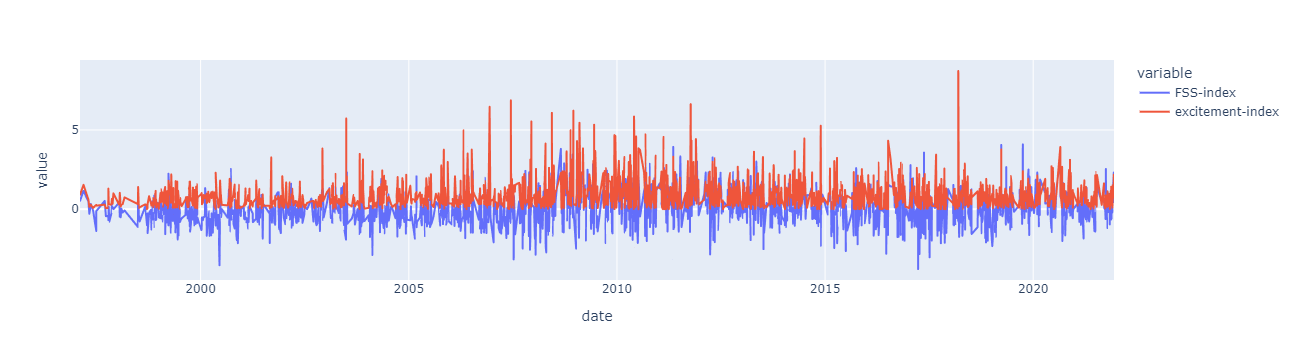

In [44]:
fig = px.line(df, x="date",y=["FSS-index","excitement-index"])
fig.show()

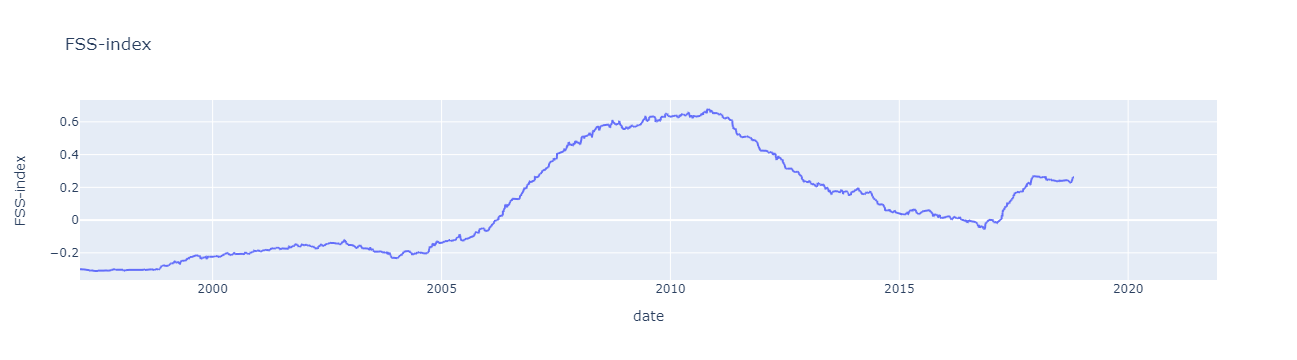

In [45]:
#pour demander un input de la période
#val=int(input("Période en jours de la moyenne mobile :"))

val=300
fig=df.rolling(val, on="date").mean().plot(x="date",y="FSS-index",backend='plotly', title="FSS-index")

fig.show()

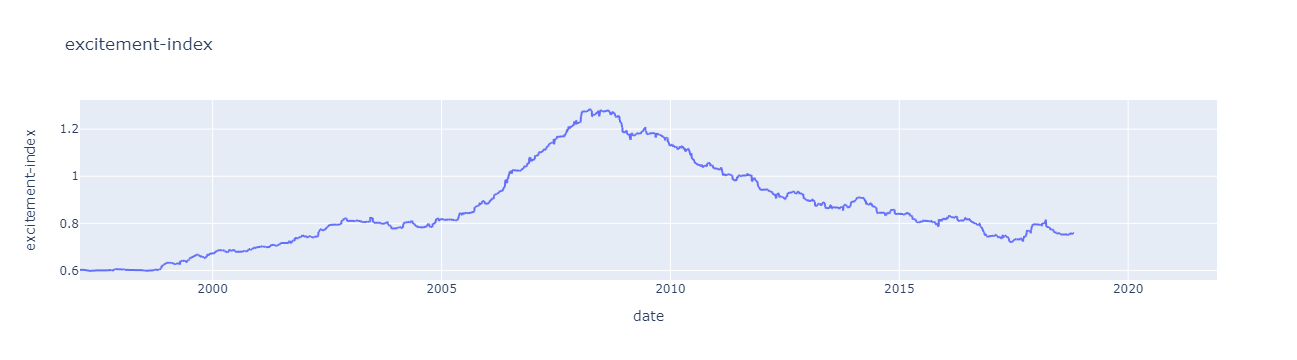

In [46]:
#pour demander un input de la période
#val=int(input("Période en jours de la moyenne mobile :"))

val=300
fig=df.rolling(val, on="date").mean().plot(x="date",y="excitement-index",backend='plotly', title="excitement-index")

fig.show()

## Dataset "financial_phrasebank"

In [47]:
#!pip install datasets

In [48]:
import datasets

dataset = datasets.load_dataset("financial_phrasebank", 'sentences_allagree')

Reusing dataset financial_phrasebank (C:\Users\Antoine\.cache\huggingface\datasets\financial_phrasebank\sentences_allagree\1.0.0\a6d468761d4e0c8ae215c77367e1092bead39deb08fbf4bffd7c0a6991febbf0)


  0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
pd.DataFrame.from_dict(dataset)

train
0     {'sentence': 'According to Gran , the company ...
1     {'sentence': 'For the last quarter of 2010 , C...
2     {'sentence': 'In the third quarter of 2010 , n...
3     {'sentence': 'Operating profit rose to EUR 13....
4     {'sentence': 'Operating profit totalled EUR 21...
...                                                 ...
2259  {'sentence': 'Operating result for the 12-mont...
2260  {'sentence': 'HELSINKI Thomson Financial - Sha...
2261  {'sentence': 'LONDON MarketWatch -- Share pric...
2262  {'sentence': 'Operating profit fell to EUR 35....
2263  {'sentence': 'Sales in Finland decreased by 10...

[2264 rows x 1 columns]